# How Have NBA Statistics Changed Overtime?

# Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# pip install matplotlib
# pip install seaborn

# run this cell if the above import statement gives you an error about modules not being found

In [3]:
regular_df = pd.read_csv('regular.csv')
regular_df.set_index('Season', inplace=True)
regular_df

,Rk,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
Season,,,,,,,,,,,,,,,,,,,,,
2025-26,1,NBA,26.4,6-7,216.0,213,242.0,41.8,89.2,13.4,...,0.468,0.358,0.791,100.5,0.543,13.2,26.4,0.227,115.6,0.583
2024-25,2,NBA,26.3,6-7,215.0,1230,241.3,41.7,89.2,13.5,...,0.467,0.360,0.780,98.8,0.543,12.6,25.2,0.189,114.5,0.576
2023-24,3,NBA,26.4,6-7,216.0,1230,241.4,42.2,88.9,12.8,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
2022-23,4,NBA,26.1,6-6,216.0,1230,241.8,42.0,88.3,12.3,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
2021-22,5,NBA,26.1,6-6,215.0,1230,241.4,40.6,88.1,12.4,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,76,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,NaN,...,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN,0.428
1949-50,77,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,NaN,...,0.340,NaN,0.712,NaN,0.340,NaN,NaN,0.284,NaN,0.410
1948-49,78,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,NaN,...,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN,0.390


In [5]:
playoffs_df = pd.read_csv('playoffs.csv')
playoffs_df.set_index('Season', inplace=True)
playoffs_df

,Rk,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
Season,,,,,,,,,,,,,,,,,,,,,
2024-25,1,NBA,26.3,6-7,215.0,84,241.5,38.9,85.6,12.4,...,0.455,0.354,0.775,95.6,0.528,12.8,25.9,0.215,113.0,0.566
2023-24,2,NBA,26.4,6-7,216.0,82,240.9,39.0,84.4,11.7,...,0.462,0.351,0.779,92.7,0.532,11.6,24.1,0.188,113.5,0.566
2022-23,3,NBA,26.1,6-6,216.0,84,241.2,40.2,87.2,12.0,...,0.461,0.351,0.794,96.1,0.530,11.7,24.0,0.197,113.5,0.566
2021-22,4,NBA,26.1,6-6,215.0,87,240.3,38.2,83.7,12.3,...,0.456,0.355,0.785,95.5,0.529,12.8,22.3,0.212,111.2,0.567
2020-21,5,NBA,26.1,6-6,217.0,85,241.2,40.2,86.9,12.5,...,0.462,0.364,0.786,96.1,0.534,11.2,22.8,0.201,114.3,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,75,NBA,NaN,NaN,NaN,26,NaN,29.5,78.4,NaN,...,0.376,NaN,0.723,NaN,0.376,NaN,NaN,0.308,NaN,0.446
1949-50,76,NBA,NaN,NaN,NaN,30,NaN,26.9,78.3,NaN,...,0.344,NaN,0.732,NaN,0.344,NaN,NaN,0.343,NaN,0.427
1948-49,77,BAA,NaN,NaN,NaN,20,NaN,26.8,81.5,NaN,...,0.329,NaN,0.717,NaN,0.329,NaN,NaN,0.306,NaN,0.405


# Exploratory Data Analysis (EDA)

In [6]:
regular_df.columns

Index(['Rk', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'ORtg', 'TS%'],
      dtype='object')

### Columns we care about - purely scoring related statistics

- field goals per game (FG)
- field goal attempts per game (FGA)
- 3 pointers per game (3P)
- 3 point attempts per game (3PA)
- free throws per game (FT)
- free throw attempts per game (FTA)


- field goal percentage (FG%)
- 3 point percentage (3P%)
- free throw percentage (FT%)
- effective field goal percentage (eFG%)
- true shooting percentage (TS%)
- points (pts)



In [7]:
desired_columns = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'FG', 'eFG%', 'PTS']

In [8]:
filtered_regular = regular_df[desired_columns].copy()
filtered_regular[['FG%', '3P%', 'FT%', 'eFG%']] *= 100
filtered_regular

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS
Season,,,,,,,,,,,,
2025-26,41.8,89.2,46.8,13.4,37.3,35.8,20.2,25.5,79.1,41.8,54.3,117.1
2024-25,41.7,89.2,46.7,13.5,37.6,36.0,16.9,21.7,78.0,41.7,54.3,113.8
2023-24,42.2,88.9,47.4,12.8,35.1,36.6,17.0,21.7,78.4,42.2,54.7,114.2
2022-23,42.0,88.3,47.5,12.3,34.2,36.1,18.4,23.5,78.2,42.0,54.5,114.7
2021-22,40.6,88.1,46.1,12.4,35.2,35.4,16.9,21.9,77.5,40.6,53.2,110.6
...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,29.8,83.6,35.7,NaN,NaN,NaN,24.5,33.4,73.3,29.8,35.7,84.1
1949-50,28.2,83.1,34.0,NaN,NaN,NaN,23.6,33.1,71.2,28.2,34.0,80.0
1948-49,29.0,88.7,32.7,NaN,NaN,NaN,22.0,31.3,70.3,29.0,32.7,80.0


In [9]:
filtered_playoffs = playoffs_df[desired_columns].copy()
filtered_playoffs[['FG%', '3P%', 'FT%', 'eFG%']] *= 100
filtered_playoffs

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS
Season,,,,,,,,,,,,
2024-25,38.9,85.6,45.5,12.4,35.2,35.4,18.4,23.8,77.5,38.9,52.8,108.8
2023-24,39.0,84.4,46.2,11.7,33.4,35.1,15.9,20.3,77.9,39.0,53.2,105.6
2022-23,40.2,87.2,46.1,12.0,34.3,35.1,17.2,21.6,79.4,40.2,53.0,109.6
2021-22,38.2,83.7,45.6,12.3,34.6,35.5,17.7,22.6,78.5,38.2,52.9,106.3
2020-21,40.2,86.9,46.2,12.5,34.3,36.4,17.5,22.2,78.6,40.2,53.4,110.3
...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,29.5,78.4,37.6,NaN,NaN,NaN,24.2,33.5,72.3,29.5,37.6,83.1
1949-50,26.9,78.3,34.4,NaN,NaN,NaN,26.8,36.7,73.2,26.9,34.4,80.6
1948-49,26.8,81.5,32.9,NaN,NaN,NaN,25.0,34.8,71.7,26.8,32.9,78.5


### Checking if any columns have Null values

In [10]:
filtered_regular.isnull().sum()

FG       0
FGA      0
FG%      0
3P      33
3PA     33
3P%     33
FT       0
FTA      0
FT%      0
FG       0
eFG%     0
PTS      0
dtype: int64

In [11]:
filtered_regular.isnull().sum()

FG       0
FGA      0
FG%      0
3P      33
3PA     33
3P%     33
FT       0
FTA      0
FT%      0
FG       0
eFG%     0
PTS      0
dtype: int64

In [12]:
two_seasons = filtered_regular.loc[["1979-80", "1978-79"]]
two_seasons

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS
Season,,,,,,,,,,,,
1979-80,43.6,90.6,48.1,0.8,2.8,28.0,21.3,27.8,76.4,43.6,48.6,109.3
1978-79,44.5,91.7,48.5,NaN,NaN,NaN,21.3,28.3,75.2,44.5,48.5,110.3


These Null values in the three point column make sense because the three point line was added in the 1979-80 season, so no data would exist before this

To fix this, we will replace the null values with 0 so that they make more context in this situation

In [13]:
filtered_regular.fillna(0, inplace=True)
filtered_regular.fillna(0, inplace=True)

### Comparing Averages

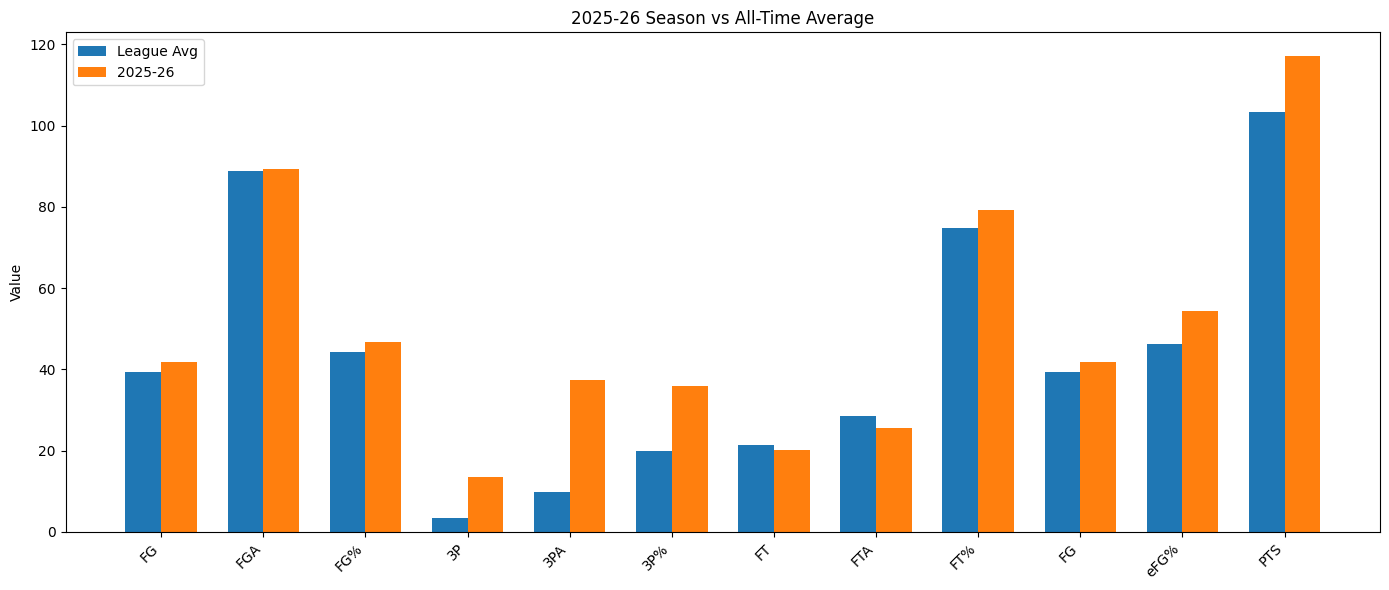

In [14]:
league_avg = filtered_regular.mean()

current = filtered_regular.loc["2025-26"]

compare = pd.DataFrame({
    "League Avg": league_avg,
    "2025-26": current
})

x = np.arange(len(compare.index))
width = 0.35   # width of each bar

plt.figure(figsize=(14, 6))

plt.bar(x - width/2, compare["League Avg"], width, label="League Avg")
plt.bar(x + width/2, compare["2025-26"], width, label="2025-26")

plt.xticks(x, compare.index, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("2025-26 Season vs All-Time Average")
plt.legend()

plt.tight_layout()
plt.show()

It seems that the biggest changes in difference are the number of 3 pointers attempted and the average points scored by a team

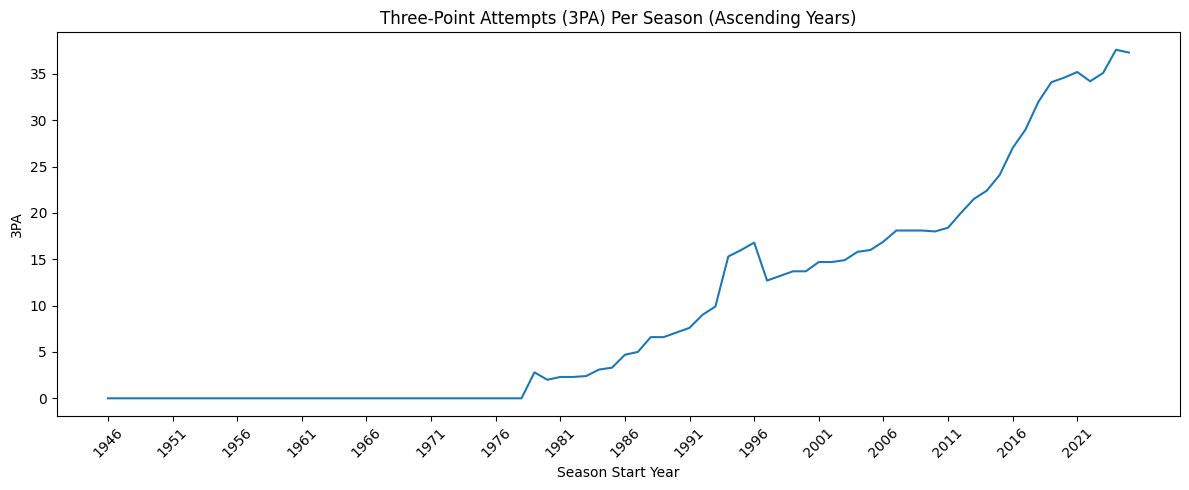

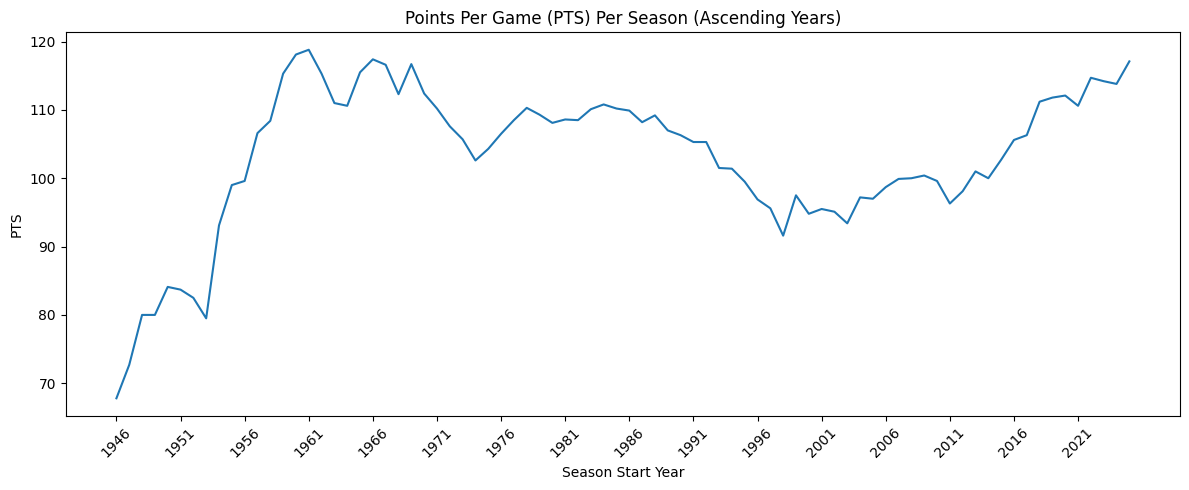

In [15]:
filtered_regular_sorted = filtered_regular.copy()

# Get the first 4 characters and convert to int
filtered_regular_sorted["Year"] = filtered_regular_sorted.index.str[:4].astype(int)

# Sort by Year ascending
filtered_regular_sorted = filtered_regular_sorted.sort_values("Year")

# Line chart for 3PA
plt.figure(figsize=(12, 5))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["3PA"])
plt.title("Three-Point Attempts (3PA) Per Season (Ascending Years)")
plt.xlabel("Season Start Year")
plt.ylabel("3PA")
plt.xticks(filtered_regular_sorted["Year"][::5], rotation=45)
plt.tight_layout()
plt.show()

# Line chart for PTS 
plt.figure(figsize=(12, 5))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["PTS"])
plt.title("Points Per Game (PTS) Per Season (Ascending Years)")
plt.xlabel("Season Start Year")
plt.ylabel("PTS")
plt.xticks(filtered_regular_sorted["Year"][::5], rotation=45)
plt.tight_layout()
plt.show()

In [16]:
standardized = filtered_regular.copy

standardized = (filtered_regular - filtered_regular.mean()) / filtered_regular.std()

standardized = standardized.fillna(0)

standardized["Year"] = standardized.index.str[:4].astype(int)

standardized = standardized.sort_values("Year", ascending=True)

standardized

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%,PTS,Year
Season,,,,,,,,,,,,,
1946-47,-2.724411,0.504543,-3.697974,-0.824008,-0.841670,-1.170960,-1.569652,-0.759524,-4.549960,-2.724411,-3.205482,-3.295252,1946
1947-48,-2.459112,0.896913,-3.584452,-0.824008,-0.841670,-1.170960,-0.900012,-0.315270,-3.095855,-2.459112,-3.118074,-2.839869,1947
1948-49,-2.091776,-0.027055,-2.608164,-0.824008,-0.841670,-1.170960,0.206351,0.553047,-1.898356,-2.091776,-2.366362,-2.161442,1948
1949-50,-2.255037,-0.735852,-2.313007,-0.824008,-0.841670,-1.170960,0.672188,0.916528,-1.513446,-2.255037,-2.139101,-2.161442,1949
1950-51,-1.928516,-0.672566,-1.927033,-0.824008,-0.841670,-1.170960,0.934222,0.977108,-0.615322,-1.928516,-1.841912,-1.780407,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-22,0.275502,-0.102997,0.434221,2.131220,2.181856,0.922178,-1.278504,-1.345133,1.180926,0.275502,1.217380,0.682377,2021
2022-23,0.561208,-0.077683,0.752082,2.107388,2.095960,0.963568,-0.841782,-1.022039,1.480301,0.561208,1.444641,1.063412,2022
2023-24,0.602023,-0.001740,0.729378,2.226550,2.173266,0.993132,-1.249389,-1.385520,1.565836,0.602023,1.479605,1.016944,2023


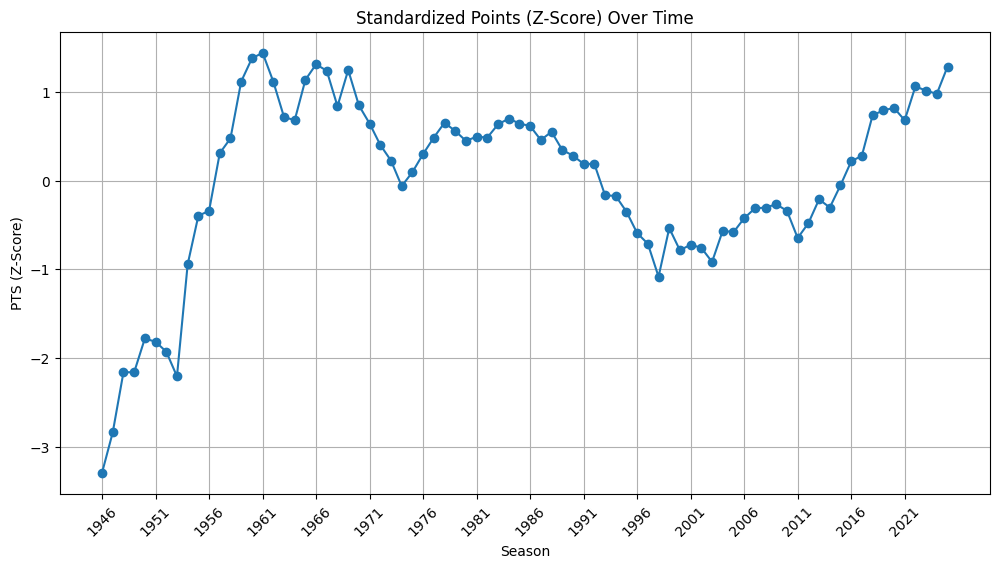

In [17]:
plt.figure(figsize=(12,6))
plt.plot(standardized.index, standardized["PTS"], marker="o")
plt.title("Standardized Points (Z-Score) Over Time")
plt.xlabel("Season")
plt.ylabel("PTS (Z-Score)")
clean_labels = standardized.index.str[:4]  # extract the year
plt.xticks(standardized.index[::5], clean_labels[::5], rotation=45)
plt.grid(True)
plt.show()

By standardizing the data, we can see clear trends in the evolution of scoring across NBA history. The early years of the league were characterized by extremely low scoring, which is expected given the slower pace and lack of a shot clock. Interestingly, the standardized plot shows that the offensive explosion of the 1950s and especially the early 1960s was just as historically extreme as the high-scoring environment of the modern NBA. While raw points per game today are very high, they are not unprecedented. Similar scoring levels occurred during the 1960s, just driven by different underlying factors such as pace instead of three-point shooting. This explains why the standardized and raw PTS graphs share a similar shape, even though the reasons behind the spikes differ across eras.

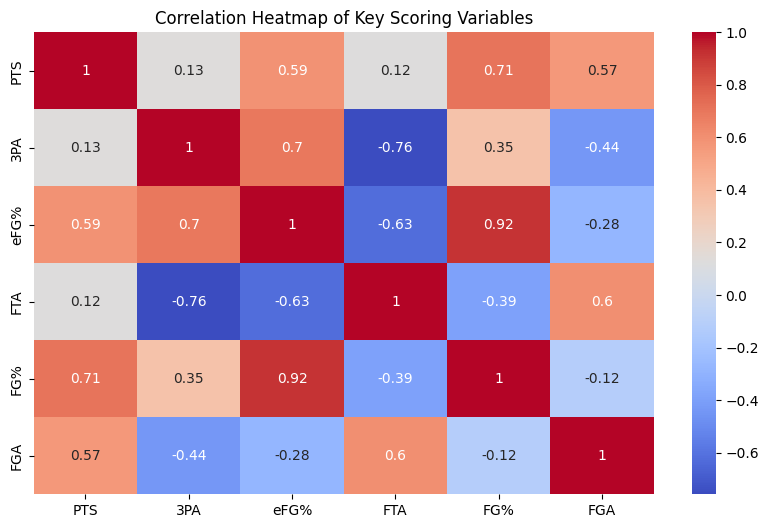

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(filtered_regular_sorted[["PTS","3PA","eFG%","FTA","FG%","FGA"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Scoring Variables")
plt.show()

Focusing on the top row of the heat map, the x axis shows the different categories and how heavily they correlate with the points scored that season. The largest value on here is FG% with 0.71 which suggests that seaons with better shooting rates resulted in more points. Similarly, effective field goal (eFG) percentage and field goals attempted (FGA) are around the 0.6 mark which suggests that they have had an impact as well. Contextually, this makes sense as season with better shooting and more shot attempts would lead to higher scoring and point totals.

In [19]:
from sklearn.linear_model import LinearRegression

X = filtered_regular_sorted[["3PA","eFG%","FTA","FGA"]]
y = filtered_regular_sorted["PTS"]

model = LinearRegression()
model.fit(X,y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R-squared:", model.score(X,y))

Coefficients: [-0.01516238  1.90413357  0.80527481  0.84819506]
Intercept: -83.04978240156085
R-squared: 0.9953234356134163


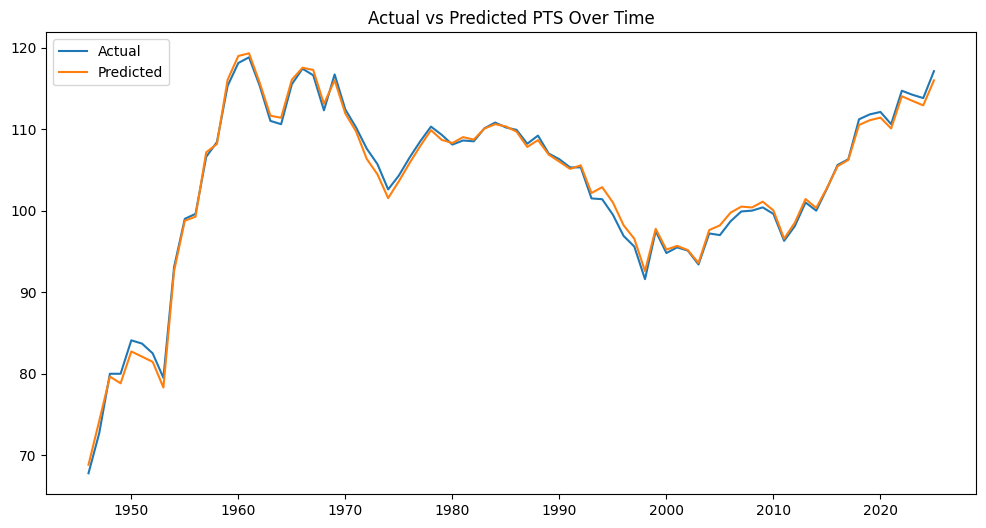

In [20]:
filtered_regular_sorted["PTS_pred"] = model.predict(X)

plt.figure(figsize=(12,6))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["PTS"], label="Actual")
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["PTS_pred"], label="Predicted")
plt.title("Actual vs Predicted PTS Over Time")
plt.legend()
plt.show()

This regression model attempts to fit a line to the original data. With an R-squard of 99.5% our model is extremely accurate and shows that we can predict the scoring with some sort of mathematical equation using the columns. The weights returned by the model also tell us what had the largest impact on scoring. The largest coefficient by far was belonging to the eFG% closely followed by FTA and that they play a role as well.

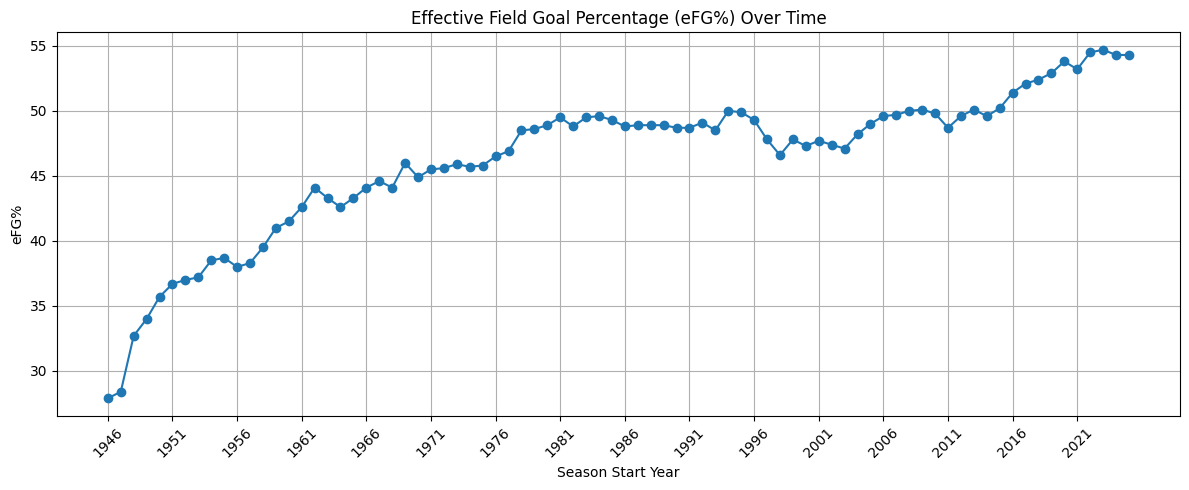

In [21]:
plt.figure(figsize=(12,5))
plt.plot(filtered_regular_sorted["Year"], filtered_regular_sorted["eFG%"], marker="o")
plt.title("Effective Field Goal Percentage (eFG%) Over Time")
plt.xlabel("Season Start Year")
plt.ylabel("eFG%")
plt.xticks(filtered_regular_sorted["Year"][::5], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Finally, looking at the analysis of the eFG% over time, we can begin to understand why the point totals of recent seasons seem to rise higher and higher. From our analysis througout this project, we found the eFG% plays the largest role in the number of points scored per season. This chart shows that it has been steadily increasing throughout the history of the NBA. The combination of the rise of eFG and its importance to point totals explains the recent trends that we have observed

https://www.nba.com/stats/leaders

Side Analysis: Certain players are claimed to have "changed the way the league has played". Ex: Steph Curry (3 Pointers), Nikola Jokic (Efficiency as a Center), James Harden (Foul Baiting/3-Point Step Back)
Shai Gilgeous-Alexander (Mid Range/Foul Baiting)

## Steph Curry: 3 Point Shot


In [24]:
curry = pd.read_csv("Curry.csv")
curry

,Season,Age,Team,Lg,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,2009-10,21,GSW,NBA,PG,80,77,36.2,6.6,14.3,...,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5,ROY-2
1,2010-11,22,GSW,NBA,PG,74,74,33.6,6.8,14.2,...,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6,NaN
2,2011-12,23,GSW,NBA,PG,26,23,28.2,5.6,11.4,...,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7,NaN
3,2012-13,24,GSW,NBA,PG,78,78,38.2,8.0,17.8,...,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9,MVP-11
4,2013-14,25,GSW,NBA,PG,78,78,36.5,8.4,17.7,...,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0,MVP-6ASNBA2
5,2014-15,26,GSW,NBA,PG,80,80,32.7,8.2,16.8,...,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8,MVP-1ASNBA1
6,2015-16,27,GSW,NBA,PG,79,79,34.2,10.2,20.2,...,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1,MVP-1ASNBA1
7,2016-17,28,GSW,NBA,PG,79,79,33.4,8.5,18.3,...,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3,MVP-6ASNBA2
8,2017-18,29,GSW,NBA,PG,51,51,32.0,8.4,16.9,...,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4,MVP-10ASNBA3
9,2018-19,30,GSW,NBA,PG,69,69,33.8,9.2,19.4,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,MVP-5ASNBA1


In [34]:
curry = curry[curry["Season"].str.contains("-")]
curry["Year"] = curry["Season"].str[:4].astype(int)
curry_small = curry[["Year", "3PA", "eFG%"]]
curry_small["eFG%"] = curry_small["eFG%"] * 100
curry_small

C:\Users\yojig\AppData\Local\Temp\ipykernel_32180\2027533157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curry_small["eFG%"] = curry_small["eFG%"] * 100


,Year,3PA,eFG%
0,2009,4.8,53.5
1,2010,4.6,55.1
2,2011,4.7,58.3
3,2012,7.7,54.9
4,2013,7.9,56.6
5,2014,8.1,59.4
6,2015,11.2,63.0
7,2016,10.0,58.0
8,2017,9.8,61.8
9,2018,11.7,60.4


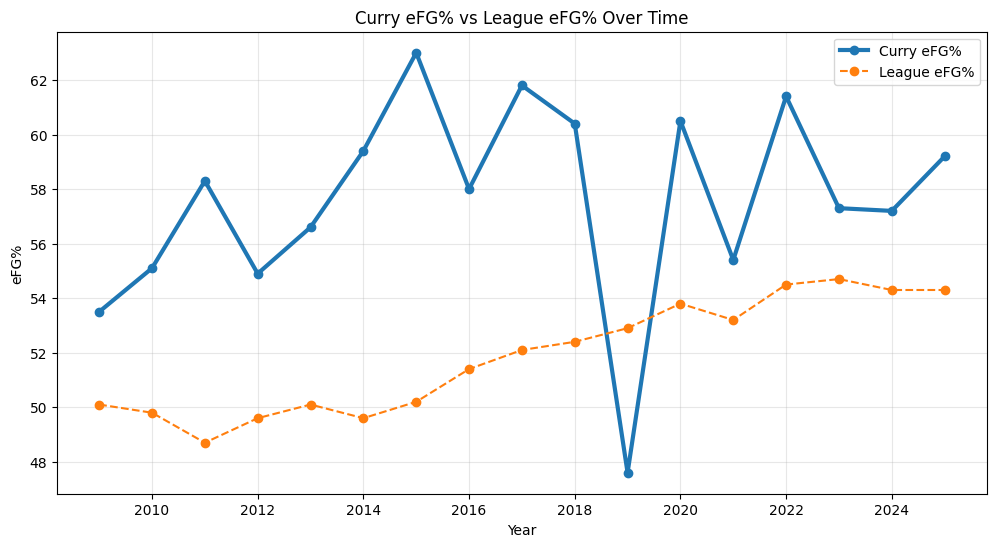

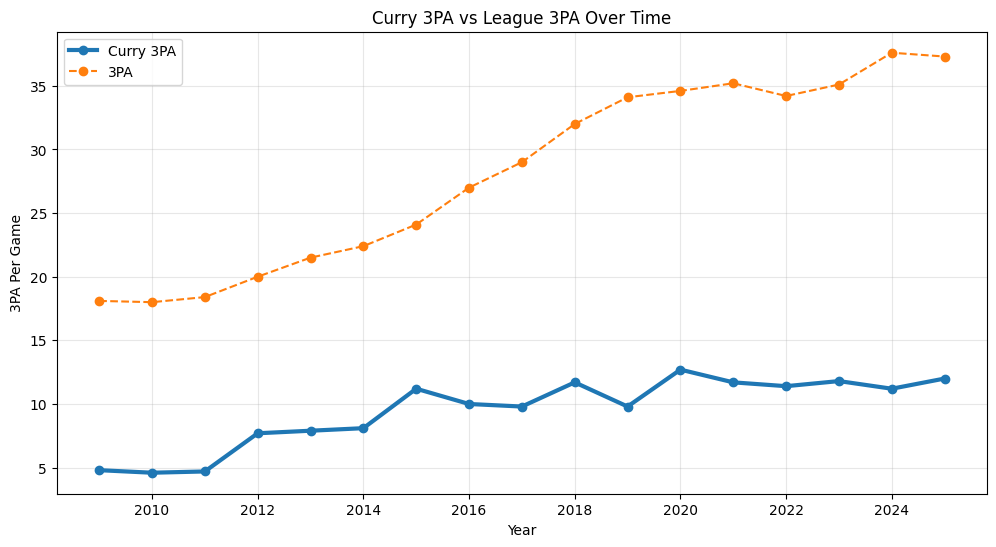

Correlation (Curry 3PA vs League 3PA): 0.8865908131125874
Correlation (Curry eFG% vs League eFG%): 0.09593677550055163


In [46]:
plt.figure(figsize=(12,6))

# Curry line
plt.plot(curry_small["Year"], curry_small["eFG%"], 
         marker="o", linewidth=3, label="Curry eFG%")

min_year = curry_small["Year"].min()
max_year = curry_small["Year"].max()
league_curry_years = filtered_regular_sorted[
    (filtered_regular_sorted["Year"] >= min_year) &
    (filtered_regular_sorted["Year"] <= max_year)
]


# League line
plt.plot(league_curry_years["Year"], league_curry_years["eFG%"], 
         marker="o", linestyle="--", label="League eFG%")

plt.title("Curry eFG% vs League eFG% Over Time")
plt.xlabel("Year")
plt.ylabel("eFG%")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

plt.figure(figsize=(12,6))

# Curry 3PA
plt.plot(curry_small["Year"], curry_small["3PA"], 
         marker="o", linewidth=3, label="Curry 3PA")

# League 3PA
plt.plot(league_curry_years["Year"], league_curry_years["3PA"], 
         marker="o", linestyle="--", label="3PA")

plt.title("Curry 3PA vs League 3PA Over Time")
plt.xlabel("Year")
plt.ylabel("3PA Per Game")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Merge Curry and League datasets on Year
merged = curry_small.merge(
    league_curry_years[["Year", "3PA", "eFG%"]].rename(
        columns={"3PA": "League_3PA", "eFG%": "League_eFG"}
    ),
    on="Year",
    how="inner"
)

# Compute correlations
corr_3pa = merged["3PA"].corr(merged["League_3PA"])
corr_efg = merged["eFG%"].corr(merged["League_eFG"])

print("Correlation (Curry 3PA vs League 3PA):", corr_3pa)
print("Correlation (Curry eFG% vs League eFG%):", corr_efg)



Looking at the data comparing league averages to Curry’s eFG% and 3PA, we see that Curry consistently outperforms the league in shooting efficiency by a significant margin. In nearly every season of his career, Curry’s eFG% sits 5–10 percentage points above the league average, an impressive gap considering the much more difficult shots he attempts. The drop in 2019 is easily explained by injury. His peak efficiency seasons also align with Golden State’s championship years, illustrating how his shooting ability powered one of the most dominant offenses in NBA history.

In addition to efficiency, Curry’s shot volume shows clear evidence of his broader impact on league trends. The correlation between Curry’s 3PA and league-wide 3PA is extremely strong (r ≈ 0.89), indicating that as Curry increased his three-point attempts, the league did the same. This supports the idea that Curry was effecting league trends. Meanwhile, the correlation between Curry’s eFG% and league eFG% is very weak (r ≈ 0.10), showing that Curry’s efficiency is largely independent of league-wide shooting trends and reinforcing that he is a statistical outlier.

Together, these patterns suggest that Curry’s style of high-efficiency three-point shooting helped reshape offensive strategy across the NBA. Teams increased their three-point attempts and redefined what constitutes an efficient shot, reflecting Curry’s significant influence on the modern era of basketball.